# Clustering Chorophyll A

In [47]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import geopandas as gpd
from sklearn.metrics.pairwise import euclidean_distances
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Chlorophyll A

In [11]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [12]:
# filter out other data
data = data[['Julian_Date', 'Sta_ID', 'ChlorA', 'Lat_Dec', 'Lon_Dec']]
data = data.dropna()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 035.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 008.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 008.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 010.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 009.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,0.441000,31.846300,-119.565900
35640,44322.0,093.3 070.0,0.296533,31.515130,-120.240520
35641,44322.0,093.3 080.0,0.214667,31.176820,-120.920900
35642,44322.0,093.3 090.0,0.235235,30.846380,-121.589030


In [13]:
# filter Sta_ID
# data['Sta_ID'] = data['Sta_ID'].str.split().str[1]
data = data.dropna()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 035.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 008.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 008.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 010.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 009.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,0.441000,31.846300,-119.565900
35640,44322.0,093.3 070.0,0.296533,31.515130,-120.240520
35641,44322.0,093.3 080.0,0.214667,31.176820,-120.920900
35642,44322.0,093.3 090.0,0.235235,30.846380,-121.589030


In [14]:
# Function to round the second part of Sta_ID to the nearest 10
def round_sta_id(value):
    parts = value.split()  # Split the Sta_ID into components
    rounded_parts = [
        f"{float(part):.1f}" if i == 0 else f"{10 * round(float(part) / 10):.1f}"
        for i, part in enumerate(parts)
    ]
    return " ".join(rounded_parts)

# Apply the rounding function to the Sta_ID column
data['Sta_ID'] = data['Sta_ID'].apply(round_sta_id)

# Display the updated DataFrame
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
18831,26731.0,133.0 40.0,0.650000,25.850000,-113.500000
18832,26733.0,142.7 10.0,2.483333,25.026666,-110.750000
18833,26733.0,142.0 10.0,0.240000,25.093333,-110.783333
18834,26734.0,120.0 10.0,2.425000,28.856666,-113.258333
18835,26735.0,120.0 10.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
35639,44321.0,93.3 60.0,0.441000,31.846300,-119.565900
35640,44322.0,93.3 70.0,0.296533,31.515130,-120.240520
35641,44322.0,93.3 80.0,0.214667,31.176820,-120.920900
35642,44322.0,93.3 90.0,0.235235,30.846380,-121.589030


In [15]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

510

In [16]:
# # round to nearest station
# data['Sta_ID'] = data['Sta_ID'].astype(float)
# data['Sta_ID'] = data['Sta_ID'].apply(lambda x: round(x / 10) * 10)
# data

In [17]:
# Define the grouping logic
grouped_dates = []
current_group = []

for idx, date in enumerate(data['Julian_Date']):
    if not current_group or (date - current_group[0]) <= 30:
        current_group.append(date)
    else:
        grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))
        current_group = [date]

# Add the last group
if current_group:
    grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))

# Replace the Julian_Date column with the grouped dates
data['Julian_Date'] = grouped_dates

# Drop duplicates if needed to keep unique Julian_Date aggregates
data = data.drop_duplicates().reset_index(drop=True)

# Display the result
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
0,26740.0,133.0 40.0,0.650000,25.850000,-113.500000
1,26740.0,142.7 10.0,2.483333,25.026666,-110.750000
2,26740.0,142.0 10.0,0.240000,25.093333,-110.783333
3,26740.0,120.0 10.0,2.425000,28.856666,-113.258333
4,26740.0,120.0 10.0,5.540909,28.878333,-113.191666
...,...,...,...,...,...
13927,44325.0,93.3 60.0,0.441000,31.846300,-119.565900
13928,44325.0,93.3 70.0,0.296533,31.515130,-120.240520
13929,44325.0,93.3 80.0,0.214667,31.176820,-120.920900
13930,44325.0,93.3 90.0,0.235235,30.846380,-121.589030


In [18]:
data = data.groupby(['Julian_Date', 'Sta_ID'], as_index=False)[['ChlorA', 'Lat_Dec', 'Lon_Dec']].mean()
data

,Julian_Date,Sta_ID,ChlorA,Lat_Dec,Lon_Dec
0,26740.0,106.7 0.0,9.590250,31.430000,-114.240000
1,26740.0,106.7 10.0,10.211667,31.316666,-114.441666
2,26740.0,107.0 10.0,10.099889,31.174444,-114.675000
3,26740.0,107.5 0.0,6.817500,31.245000,-114.200000
4,26740.0,107.5 10.0,4.865000,31.485000,-113.791666
...,...,...,...,...,...
7716,44325.0,93.3 50.0,0.604308,32.179380,-118.894120
7717,44325.0,93.3 60.0,0.494000,31.929840,-119.399015
7718,44325.0,93.3 70.0,0.296533,31.515130,-120.240520
7719,44325.0,93.3 80.0,0.214667,31.176820,-120.920900


In [19]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

510

In [20]:
# # save Lat and Lon
# stations = {}
# for sta_id, group in data.groupby('Sta_ID'):
#     stations[sta_id] = group[['Lat_Dec', 'Lon_Dec']]

# stations

In [21]:
pivoted_df = data.pivot(index='Julian_Date', columns='Sta_ID', values='ChlorA')
pivoted_df

Sta_ID,100.0 100.0,100.0 30.0,100.0 40.0,100.0 50.0,100.0 60.0,100.0 70.0,100.0 80.0,100.0 90.0,100.5 50.0,100.5 60.0,...,98.5 50.0,98.7 40.0,98.7 50.0,99.0 30.0,99.0 40.0,99.0 50.0,99.0 60.0,99.5 40.0,99.7 40.0,99.7 50.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
26740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28470.0,NaN,0.944000,0.662803,0.623158,0.472500,0.505263,0.367222,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28512.0,NaN,0.088500,0.152000,0.165000,0.350000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28552.0,NaN,0.106842,0.088085,0.146667,0.084737,0.098824,0.130000,0.076842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
non_nan_counts = pivoted_df.count()

max_non_nan_column = non_nan_counts.idxmax()
max_non_nan_count = non_nan_counts.max()

print(f"Column with most non-NaN values: {max_non_nan_column}")
print(f"Number of non-NaN values: {max_non_nan_count}")


Column with most non-NaN values: 90.0 50.0
Number of non-NaN values: 138


In [23]:
column = pivoted_df[max_non_nan_column]
column 

Julian_Date
26740.0         NaN
26809.0         NaN
28470.0    0.428571
28512.0    0.099375
28552.0    0.156500
             ...   
40759.0    0.691000
40840.0    0.151176
40943.0    0.175789
40999.0    0.257917
44325.0    1.641765
Name: 90.0 50.0, Length: 149, dtype: float64

In [24]:
column = column.dropna()
column

Julian_Date
28470.0    0.428571
28512.0    0.099375
28552.0    0.156500
28594.0    0.169474
28641.0    0.255909
             ...   
40759.0    0.691000
40840.0    0.151176
40943.0    0.175789
40999.0    0.257917
44325.0    1.641765
Name: 90.0 50.0, Length: 138, dtype: float64

In [25]:
# Calculate the number of NaN values in each column (station)
nan_counts = pivoted_df.isna().sum()

# Sort the stations by the number of NaN values in descending order
stations_with_most_nans = nan_counts.sort_values(ascending=False)

# Drop the stations with the most NaN values
pivoted_df_cleaned = pivoted_df.drop(columns=stations_with_most_nans.index[:470])  # Adjust the number (5) as needed

# Display the cleaned dataframe
print(pivoted_df_cleaned)


Sta_ID       76.7 50.0  76.7 60.0  76.7 70.0  76.7 80.0  76.7 90.0  80.0 50.0  \
Julian_Date                                                                     
26740.0            NaN        NaN        NaN        NaN        NaN        NaN   
26809.0            NaN        NaN        NaN        NaN        NaN        NaN   
28470.0            NaN        NaN        NaN        NaN        NaN        NaN   
28512.0       0.585385   0.435312   0.159375   0.101333   0.064667   0.614286   
28552.0       0.527273   0.290000   0.230500   0.161000   0.110500   0.430000   
...                ...        ...        ...        ...        ...        ...   
40759.0       7.162481   0.976053   0.256957   0.205263   0.268333   2.716250   
40840.0       1.146286   0.335000   0.224444   0.207500   0.222273   2.391944   
40943.0       0.554895   0.475714   0.167222   0.166111   0.180455   1.063125   
40999.0       0.672368   0.835105   0.245238   0.371429   0.240476   3.375333   
44325.0            NaN      

In [26]:
pivoted_df_cleaned = pivoted_df_cleaned.dropna()
pivoted_df_cleaned

Sta_ID,76.7 50.0,76.7 60.0,76.7 70.0,76.7 80.0,76.7 90.0,80.0 50.0,80.0 60.0,80.0 70.0,80.0 80.0,80.0 90.0,...,90.0 80.0,90.0 90.0,93.3 100.0,93.3 30.0,93.3 40.0,93.3 50.0,93.3 60.0,93.3 70.0,93.3 80.0,93.3 90.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
31734.0,0.966522,0.811919,0.257917,0.327083,0.200909,0.602143,0.384619,0.207500,0.183750,0.157826,...,0.150000,0.166190,0.115595,0.338496,0.188766,0.209524,0.189686,0.147500,0.133913,0.117500
31845.0,0.594070,0.512151,0.350833,0.114500,0.141667,1.118000,0.546868,0.307679,0.188333,0.129524,...,0.137273,0.250949,0.098636,0.416665,0.344422,0.380870,0.245130,0.105000,0.157358,0.153043
31905.0,1.336818,0.392899,0.160435,0.123636,0.140000,0.813750,0.534464,0.435899,0.170417,0.151905,...,0.213391,0.137000,0.113182,0.270072,0.211128,0.319221,0.196773,0.135000,0.126522,0.191159
32031.0,3.097143,0.294583,0.243500,0.153636,0.127826,1.778000,0.496364,0.182273,0.115000,0.114762,...,0.107273,0.144545,0.099130,0.517944,0.190711,0.240952,0.164594,0.138900,0.104091,0.127391
32168.0,5.123447,1.472238,0.277083,0.167826,0.327045,1.393636,1.943972,0.466087,0.219130,0.218095,...,0.257391,0.112609,0.144091,0.406411,0.429130,0.253750,0.199165,0.190000,0.240000,0.167917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40202.0,0.762661,0.437789,0.298947,0.409615,0.199524,0.614167,0.287832,0.353333,0.295789,0.186500,...,0.233810,0.275606,0.125200,0.312074,0.197578,0.169524,0.190341,0.168421,0.207000,0.130000
40567.0,2.922847,1.303739,0.601111,0.168889,0.330400,2.508167,2.574298,0.350000,0.214211,0.291579,...,0.165500,0.125000,0.155000,0.425454,0.490848,0.728421,0.192511,0.293158,0.284545,0.249200
40759.0,7.162481,0.976053,0.256957,0.205263,0.268333,2.716250,1.152391,0.214000,0.232000,0.257778,...,0.180000,0.110588,0.103810,0.313577,0.417122,0.205294,0.197857,0.392222,0.137273,0.175217


In [27]:
pivoted_df_cleaned = pivoted_df_cleaned.T
pivoted_df_cleaned

Julian_Date,31734.0,31845.0,31905.0,32031.0,32168.0,32384.0,32434.0,32535.0,32621.0,32717.0,...,39682.0,39743.0,39828.0,40018.0,40132.0,40202.0,40567.0,40759.0,40840.0,40943.0
Sta_ID,,,,,,,,,,,,,,,,,,,,,
76.7 50.0,0.966522,0.594070,1.336818,3.097143,5.123447,2.390472,1.225175,3.642894,0.562886,5.746351,...,2.102667,1.337381,1.297682,0.363567,2.147134,0.762661,2.922847,7.162481,1.146286,0.554895
76.7 60.0,0.811919,0.512151,0.392899,0.294583,1.472238,1.410208,0.245625,0.263958,0.297523,1.771730,...,0.429091,0.277000,0.485691,0.218079,0.957105,0.437789,1.303739,0.976053,0.335000,0.475714
76.7 70.0,0.257917,0.350833,0.160435,0.243500,0.277083,0.321667,0.196522,0.267875,0.306667,0.290575,...,0.255238,0.455238,0.297895,0.322000,0.388182,0.298947,0.601111,0.256957,0.224444,0.167222
76.7 80.0,0.327083,0.114500,0.123636,0.153636,0.167826,0.379167,0.250417,0.221000,0.250583,0.133611,...,0.200500,0.313000,0.240000,0.211304,0.268000,0.409615,0.168889,0.205263,0.207500,0.166111
76.7 90.0,0.200909,0.141667,0.140000,0.127826,0.327045,0.207500,0.237321,0.210833,0.264286,0.186071,...,0.258636,0.210000,0.126667,0.331111,0.197619,0.199524,0.330400,0.268333,0.222273,0.180455
80.0 50.0,0.602143,1.118000,0.813750,1.778000,1.393636,1.095000,0.930000,3.766154,0.735375,0.813000,...,1.617143,1.104221,2.246000,2.433333,0.978000,0.614167,2.508167,2.716250,2.391944,1.063125
80.0 60.0,0.384619,0.546868,0.534464,0.496364,1.943972,1.023939,0.402016,1.385154,0.295375,0.874299,...,0.507773,0.671422,0.407972,0.970952,0.994750,0.287832,2.574298,1.152391,0.221077,1.080512
80.0 70.0,0.207500,0.307679,0.435899,0.182273,0.466087,0.233913,0.179565,0.397391,0.413500,0.479886,...,0.197143,0.386000,0.307143,0.207143,0.767083,0.353333,0.350000,0.214000,0.169444,0.162381
80.0 80.0,0.183750,0.188333,0.170417,0.115000,0.219130,0.330917,0.182500,0.399855,0.170000,0.117083,...,0.346957,0.392857,0.161000,0.208421,0.232000,0.295789,0.214211,0.232000,0.172105,0.236364


In [28]:
# normalize the data
pivoted_df = (pivoted_df_cleaned - pivoted_df_cleaned.mean())/pivoted_df_cleaned.std()
pivoted_df

Julian_Date,31734.0,31845.0,31905.0,32031.0,32168.0,32384.0,32434.0,32535.0,32621.0,32717.0,...,39682.0,39743.0,39828.0,40018.0,40132.0,40202.0,40567.0,40759.0,40840.0,40943.0
Sta_ID,,,,,,,,,,,,,,,,,,,,,
76.7 50.0,3.478620,0.151411,3.561459,5.127063,4.984310,3.062104,1.859914,2.008992,0.941725,5.683912,...,4.132044,2.815743,1.605714,-0.325747,4.118393,1.591169,2.142747,5.240369,1.310473,0.400654
76.7 60.0,2.685686,0.042477,0.190762,-0.153858,0.899919,1.420452,-0.373363,-0.440359,-0.217754,1.354693,...,0.026663,-0.366615,-0.008092,-0.513311,1.238011,0.377571,0.516262,0.184857,-0.168440,0.196679
76.7 70.0,-0.155705,-0.172040,-0.639356,-0.250116,-0.437030,-0.402534,-0.485314,-0.437520,-0.177800,-0.258605,...,-0.399808,0.168303,-0.381330,-0.379336,-0.139029,-0.141091,-0.189567,-0.402784,-0.369975,-0.598021
76.7 80.0,0.199040,-0.486311,-0.770762,-0.419448,-0.559249,-0.306238,-0.362439,-0.471499,-0.422850,-0.429572,...,-0.534084,-0.258574,-0.496394,-0.522045,-0.429921,0.272324,-0.623758,-0.445028,-0.400863,-0.600883
76.7 90.0,-0.448088,-0.450185,-0.712328,-0.468083,-0.381140,-0.593729,-0.392295,-0.478869,-0.362979,-0.372431,...,-0.391472,-0.567692,-0.721641,-0.367589,-0.600273,-0.512500,-0.461511,-0.393487,-0.373934,-0.563934
80.0 50.0,1.609777,0.848122,1.693604,2.641375,0.811992,0.892571,1.186945,2.098342,1.695396,0.310429,...,2.941025,2.115995,3.490466,2.342607,1.288585,1.036450,1.726177,1.606936,3.581217,1.709894
80.0 60.0,0.494129,0.088642,0.696287,0.226360,1.427620,0.773566,-0.016808,0.372383,-0.227138,0.377197,...,0.219675,0.817103,-0.162555,0.457297,1.329127,-0.182613,1.792610,0.328960,-0.376114,1.754684
80.0 70.0,-0.414285,-0.229426,0.344315,-0.365488,-0.225602,-0.549495,-0.523973,-0.343635,0.288997,-0.052403,...,-0.542319,-0.039490,-0.362950,-0.527410,0.778076,0.062075,-0.441822,-0.437888,-0.470236,-0.610493
80.0 80.0,-0.536095,-0.388129,-0.603711,-0.492251,-0.501858,-0.387043,-0.517282,-0.341849,-0.774951,-0.447574,...,-0.174817,-0.018911,-0.653404,-0.525762,-0.517056,-0.152887,-0.578230,-0.423179,-0.465385,-0.419907


Text(0.5, 1.0, 'Dendrogram')

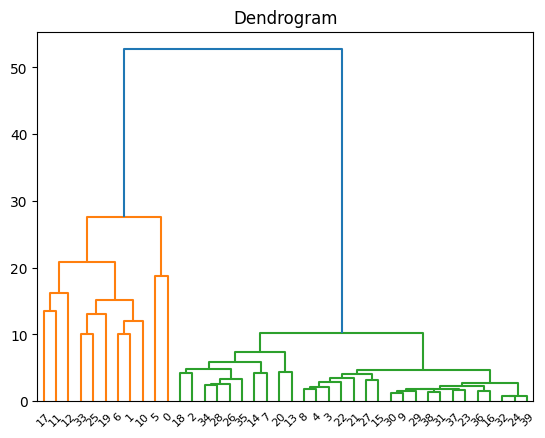

In [29]:
data_clust = np.array(pivoted_df)
linked = linkage(data_clust, method = 'ward')

dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=40)
plt.title('Dendrogram')

In [30]:
### now cluster
n_clusters = 2
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  metric='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data_clust)

### find mean pattern of each cluster
cluster_pattern = np.array([data_clust[cn==i].mean(axis=0) for i in range(n_clusters)])

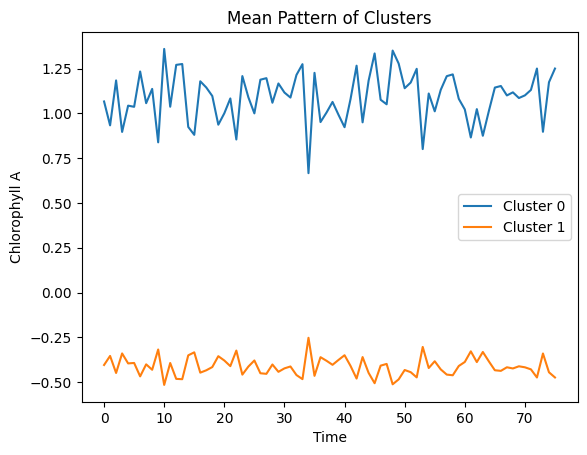

In [31]:
### visualize clusters
plt.plot(cluster_pattern.T)
plt.ylabel('Chlorophyll A')
plt.xlabel('Time')
plt.title('Mean Pattern of Clusters')
plt.legend([f'Cluster {i}' for i in range(n_clusters)])

In [32]:
# get the latitude and Longitude of these stations
stations_of_interest = pivoted_df.index

# Filter the DataFrame to get only the rows for the stations of interest
data = data.groupby(['Sta_ID'], as_index=False)[['Lat_Dec', 'Lon_Dec']].mean()
stations_lat_lon = data[data['Sta_ID'].isin(stations_of_interest)]

# Display the result
#print(stations_lat_lon[['Sta_ID', 'Lat_Dec', 'Lon_Dec']])
Lat = stations_lat_lon['Lat_Dec']
Lon = stations_lat_lon['Lon_Dec']
Lat

285    35.051082
286    34.805085
287    34.389891
288    34.056716
289    33.722502
301    34.449446
302    34.227205
303    33.817404
304    33.484515
305    33.151204
309    34.276591
319    34.205186
320    33.879361
321    33.660920
322    33.244791
323    32.911259
324    32.578489
355    33.887501
356    33.655778
357    33.323215
358    33.063713
359    32.657349
360    32.324244
361    31.991648
391    31.087341
402    33.443763
403    33.108585
404    32.656486
405    32.418054
406    32.083863
407    31.751461
408    31.416839
431    30.513100
442    32.900470
443    32.513181
444    32.182892
445    31.921152
446    31.513284
447    31.179892
448    30.847246
Name: Lat_Dec, dtype: float64

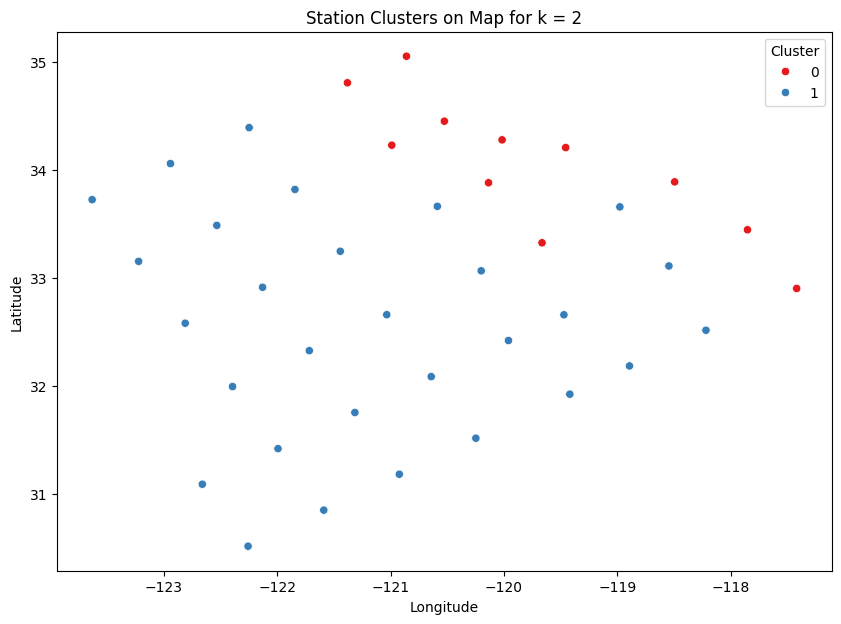

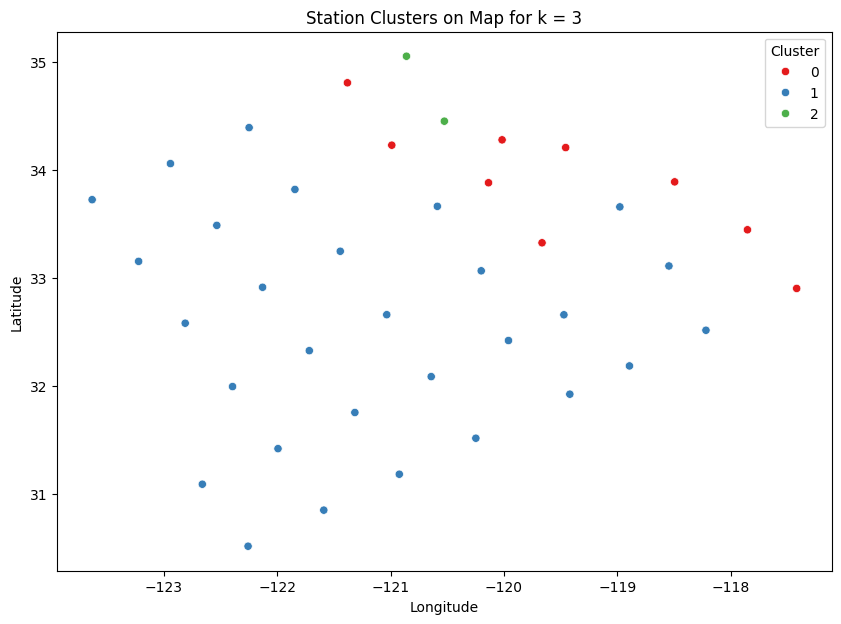

In [33]:
#data_prob2 = pd.read_csv('data_problem2.csv', header = None)
locations = pd.DataFrame()
locations['lat'] = Lat
locations['lon'] = Lon
locations

for k in [2, 3]:
    cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = cluster.fit_predict(data_clust)

    # Step 1(i): Plot mean streamflow pattern
    # mean_streamflow = data.groupby(labels).mean()
    
    # plt.figure(figsize=(10, 5))
    # for i in range(k):
    #     plt.plot(mean_streamflow.iloc[i], label=f'Cluster {i+1}')
    # plt.title(f'Mean Streamflow Pattern for k = {k}')
    # plt.xlabel('Time')
    # plt.ylabel('Mean Streamflow')
    # plt.legend()
    # plt.show()

    # Step 1(ii): Plot clusters of stations on the map
    locations['cluster'] = labels
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=locations, x='lon', y='lat', hue='cluster', palette='Set1', marker='o')
    plt.title(f'Station Clusters on Map for k = {k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.show()


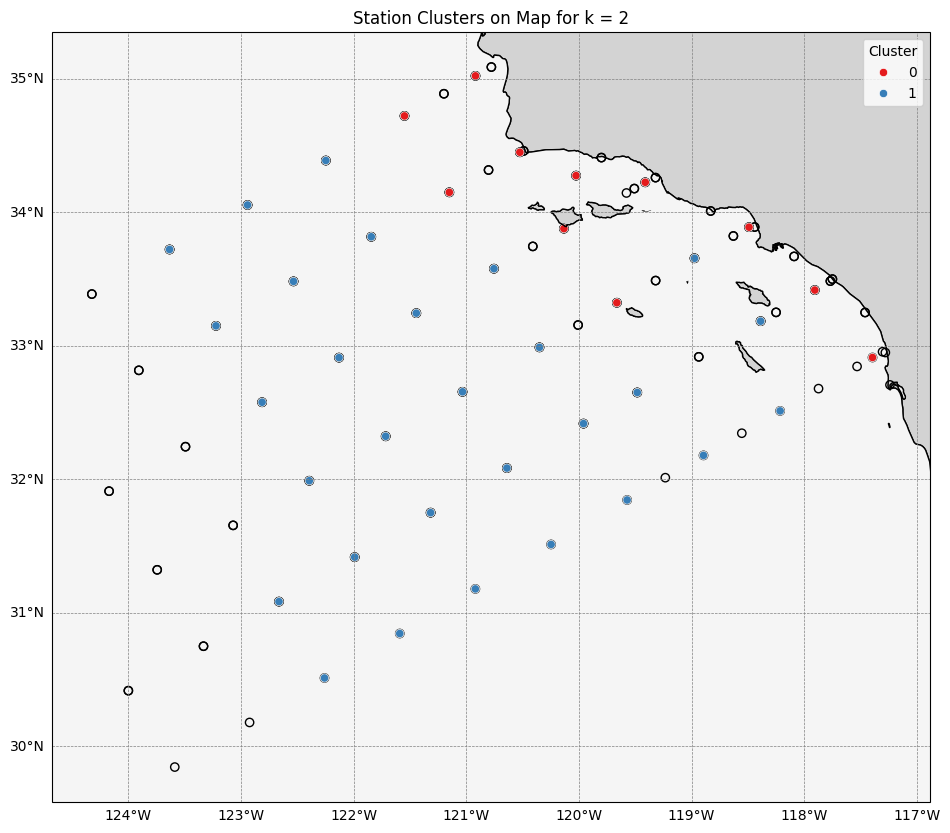

In [50]:
# Read the KML file using GeoPandas
gdf = gpd.read_file('Datasets/CalCOFI_75StandardStations.kml')
gdf = gdf.to_crs(epsg=4326)  # Ensure CRS matches the lat/lon format

# Extract the coordinates from the background map
map_coords = np.array(list(zip(gdf.geometry.y, gdf.geometry.x)))

# Create a copy of the locations DataFrame to modify
adjusted_locations = locations.copy()

# Replace each lat/lon in the data with the nearest lat/lon from the map
for idx, row in adjusted_locations.iterrows():
    data_point = np.array([[row['lat'], row['lon']]])
    distances = euclidean_distances(data_point, map_coords)
    nearest_idx = np.argmin(distances)
    adjusted_locations.at[idx, 'lat'] = map_coords[nearest_idx][0]
    adjusted_locations.at[idx, 'lon'] = map_coords[nearest_idx][1]

# Plot the adjusted clusters on the map for k = 2
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and geographical features with lighter gray colors
ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='whitesmoke')

# Add gridlines with labels only on the right and bottom
gridlines = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
gridlines.top_labels = False
gridlines.left_labels = True
gridlines.right_labels = False
gridlines.bottom_labels = True

# Plot the background map
gdf.plot(ax=ax, transform=ccrs.PlateCarree(), color='none', edgecolor='black')

# Plot the adjusted locations with clusters for k = 2
k = 2
cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_clust)
adjusted_locations['cluster'] = labels

sns.scatterplot(
    data=adjusted_locations,
    x='lon', y='lat',
    hue='cluster', palette='Set1',
    marker='o', ax=ax,
    transform=ccrs.PlateCarree()
)

plt.title(f'Station Clusters on Map for k = {k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

## SOM

In [490]:
#do PCA using built-in library
pca = PCA()
PCs = pca.fit_transform(pivoted_df)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

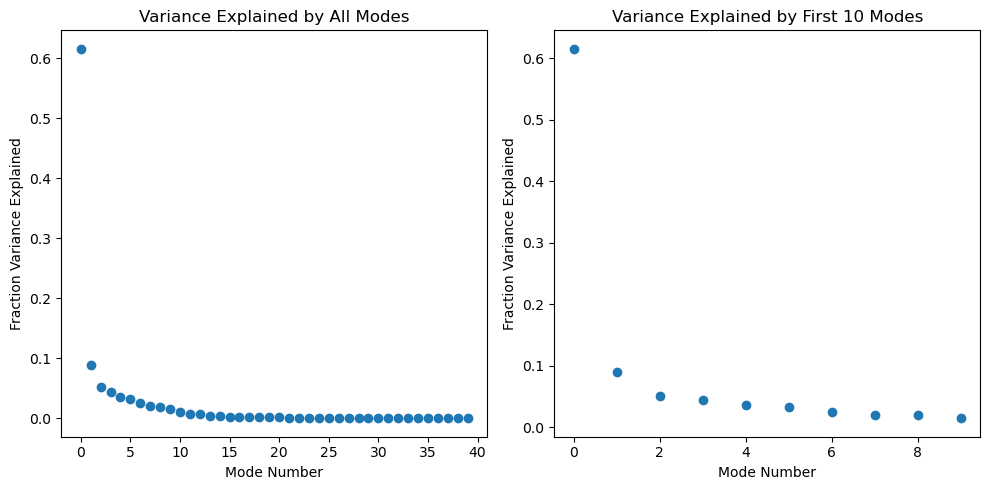

In [491]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [494]:
%run som_class.ipynb

In [497]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest -- can take a couple minutes

#make and train the self-organizing map

N = len(pivoted_df) #number of observations to use as input to SOM
obs = np.array(pivoted_df)[-N:]

#define constants (we will try 1x2 SOM, 2x2 SOM, 2x3 SOM, 3x3 SOM, and 5x7 SOM)
# here is for 1x2 SOM (Nx=1, Ny=2): nx=2, ny=3
Nx = 2
Ny = 2
N_nodes = Nx*Ny # number of nodes in SOM
N_obs = np.shape(obs)[0] #number of observations 
N_dims = np.shape(obs)[1] #number of dimensions per observation
learning_rate = 1e-2
N_epochs = 100
colours_list = 'pink_blue_red_purple'
colours_list = 'pinks'
colours_list = 'default2'

#initialize
som = SOM(Nx, Ny, obs, N_epochs, linewidth = 4, colours_list = colours_list)
som.initialize_map(node_shape = 'rect')

#train
som.train_map(learning_rate)
z = som.z #this is the pattern of each BMU
z_epochs = som.z_epochs #this is the pattern of each BMU through training (each epoch)
bmus = BMUs(som) #bmu of each observation
freq = BMU_frequency(som) #frequency of each bmu
_,bmus_colours = colourmap_2D(colours_list = colours_list, Nx = Nx, Ny = Ny) #colours of each bmu, for plotting
QE = som.QE() #quantization error of map
TE = som.TE() #topographic error of map

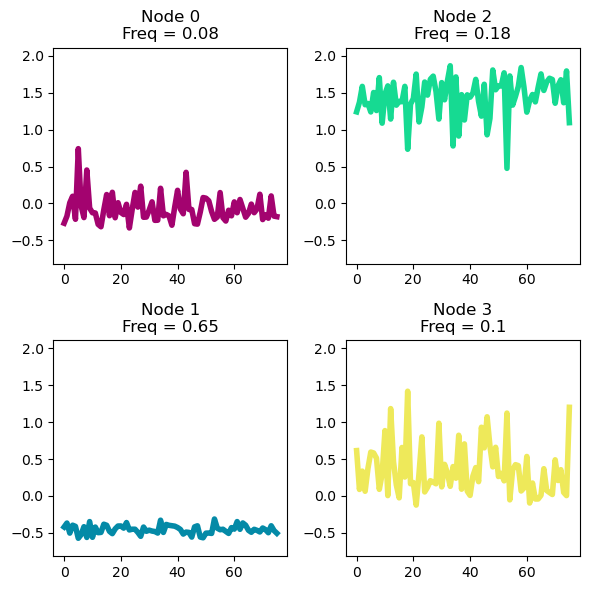

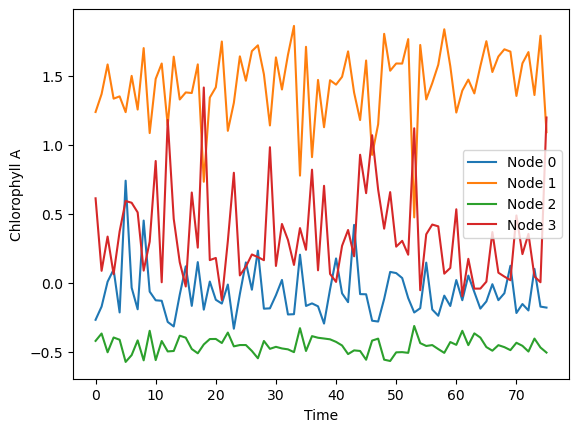

In [498]:
# Assuming som.plot() returns a figure and a numpy array of axes
fig, axes = som.plot()

# Create a new figure to overlay all plots
fig_overlay, ax_overlay = plt.subplots()

# Initialize a counter for labeling
line_counter = 0

# Flatten axes in case they are in a numpy array, then iterate over each axis
for ax in axes.ravel():  # Flatten the array in case of multi-dimensional axes
    if hasattr(ax, 'get_lines'):  # Ensure ax is a valid axis with lines
        for line in ax.get_lines():  # Get all line objects from each subplot
            # Plot and label each line in sequence
            ax_overlay.plot(line.get_xdata(), line.get_ydata(), label=f"Node {line_counter}")
            line_counter += 1  # Increment counter for next line


ax_overlay.legend()
plt.xlabel('Time')
plt.ylabel('Chlorophyll A')
plt.show()

In [499]:
locations['BMU'] = bmus
locations

,lat,lon,cluster,BMU
285,35.051082,-120.860214,2,2
286,34.805085,-121.381055,0,3
287,34.389891,-122.248377,1,1
288,34.056716,-122.942397,1,1
289,33.722502,-123.633426,1,1
301,34.449446,-120.525940,2,2
302,34.227205,-120.989762,0,3
303,33.817404,-121.844228,1,1
304,33.484515,-122.533425,1,1
305,33.151204,-123.223229,1,1


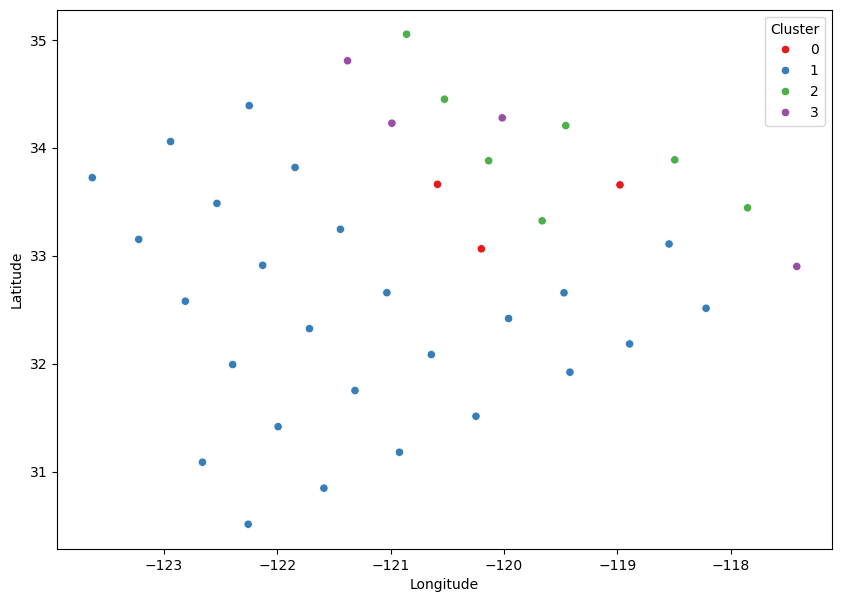

In [500]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=locations, x='lon', y='lat', hue='BMU', palette='Set1', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()